# Desafio 1: Wikipédia com XPath

Neste desafio você irá acessar a página de artigos destacados da Wikipédia em português e coletar todos os artigos destacados e suas respectivas URLs.

Lembre-se que as Ferramentas de Desenvolvimento do Chrome são essenciais nesse desafio!


Antes de começar o desafio, [acesse o site](https://pt.wikipedia.org/wiki/Wikip%C3%A9dia:Artigos_destacados) para ir se familiarizando. A lista que queremos está localizada na caixa com título **Conteúdo**:

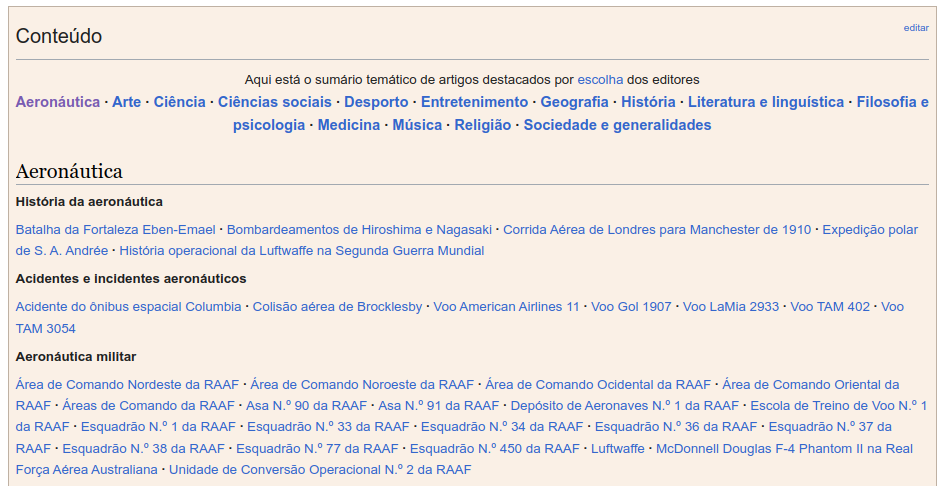

## Qual o nosso objetivo e como chegar lá?

Podemos ver que a lista de artigos é bem grande, e eles estão divididos por seções e subseções. Então, vamos **criar um conjunto de dados** com **todos os nomes dos artigos**, **suas URLs** e também **as seções e subseções** que eles pertencem.

Para chegar lá, vamos elaborar um possível passo-a-passo: 
1. Investigar a disposição dos elementos na página com o Inspetor de Elementos
2. Acessar a página dos artigos destacados com `requests_html`
3. Coletar as informações encontradas na página utilizando XPath
4. Salvar o conteúdo em CSV

Vamos lá?!

*Caso não tenha as bibliotecas utilizadas no desafio instaladas, descomente a célula abaixo e a execute*

In [ ]:
# !pip install requests_html pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.6 MB/s 
     |████████████████████████████████| 112 kB 54.3 MB/s 
     |████████████████████████████████| 140 kB 58.0 MB/s 
     |████████████████████████████████| 127 kB 59.6 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=1fac54c8855c93f5e284421ba31bf4b9c0a78b9b2f390db99aac309adf42bd15
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=78d136f85ea92d106c844da49b392ddf0c1235f9906da97d069df868a8d039d6
  Stored in directory: /root/.cache/pip/wheels/9c/aa/cc/f2228050ccb40f22144b073f15a2c84f11204f29fc0dce028e
Successfully built fake-useragent parse
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urll

## Investigando os elementos da página

Utilizando o Inspetor de Elementos, queremos inicialmente identificar qual elemento contém a lista completa.

Neste caso, o elemento que contém todos os outros é do tipo **`div`** e podemos identificá-la pela classe **`hlist`**.

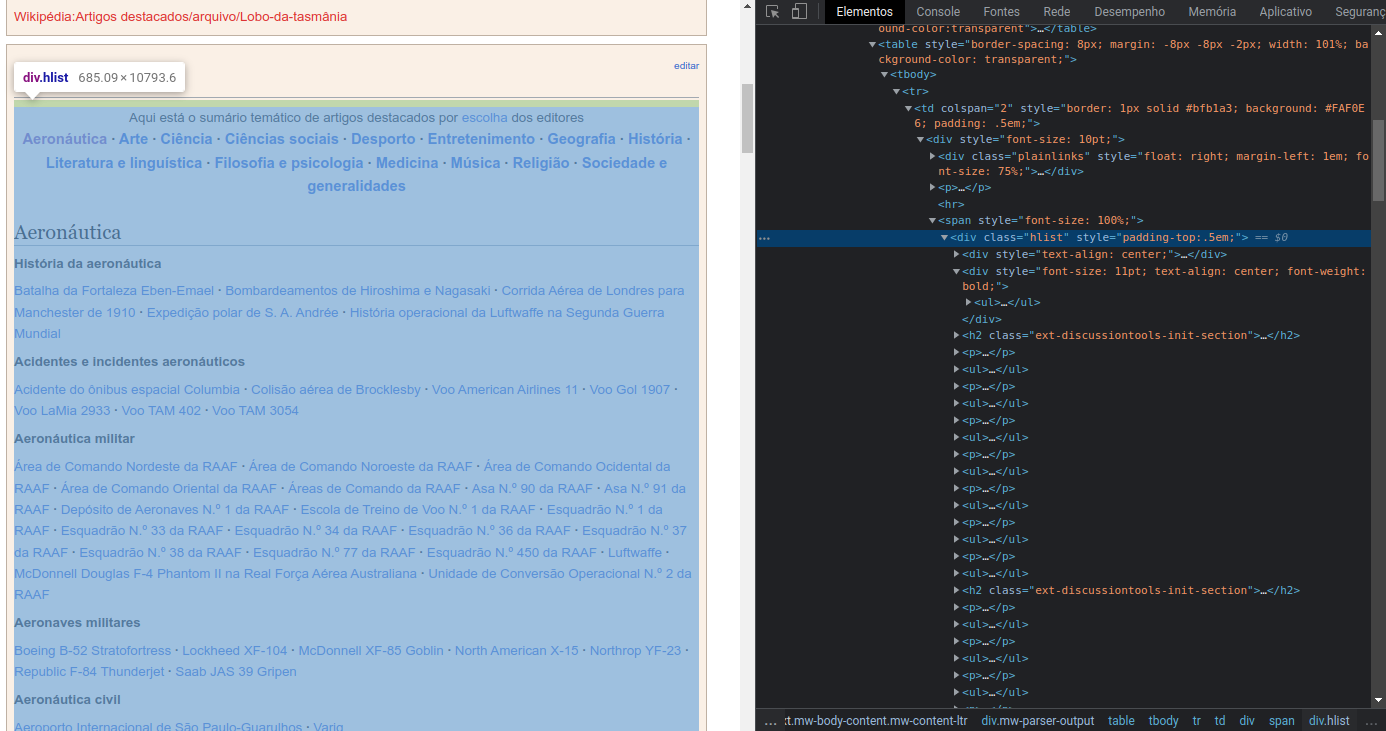

**Qual o XPath para selecionar este elemento `div` de classe `hlist` dentro do HTML da página?**

Resposta: `//span/div[@class='hlist']`

E os elementos das seções, subseções, artigos e URL dos artigos, como conseguimos encontrá-los dentro dessa `div`?

**Qual tipo do elemento (exemplo: `div`, `p`, etc.) de uma seção (ex: Aeronáutica)?**:

Resposta: `h2`


**Qual tipo do elemento de uma subseção (ex: História da aeronáutica)?**:

Resposta: `p`

**Qual tipo do elemento de uma artigo (ex: Batalha da Fortaleza Eben-Emael)?**:

Resposta: `ul` e mais internamente, `li`

**Onde a URL do artigo se localiza dentro do elemento do artigo?**:

Resposta: No atributo `href` do elemento `a`

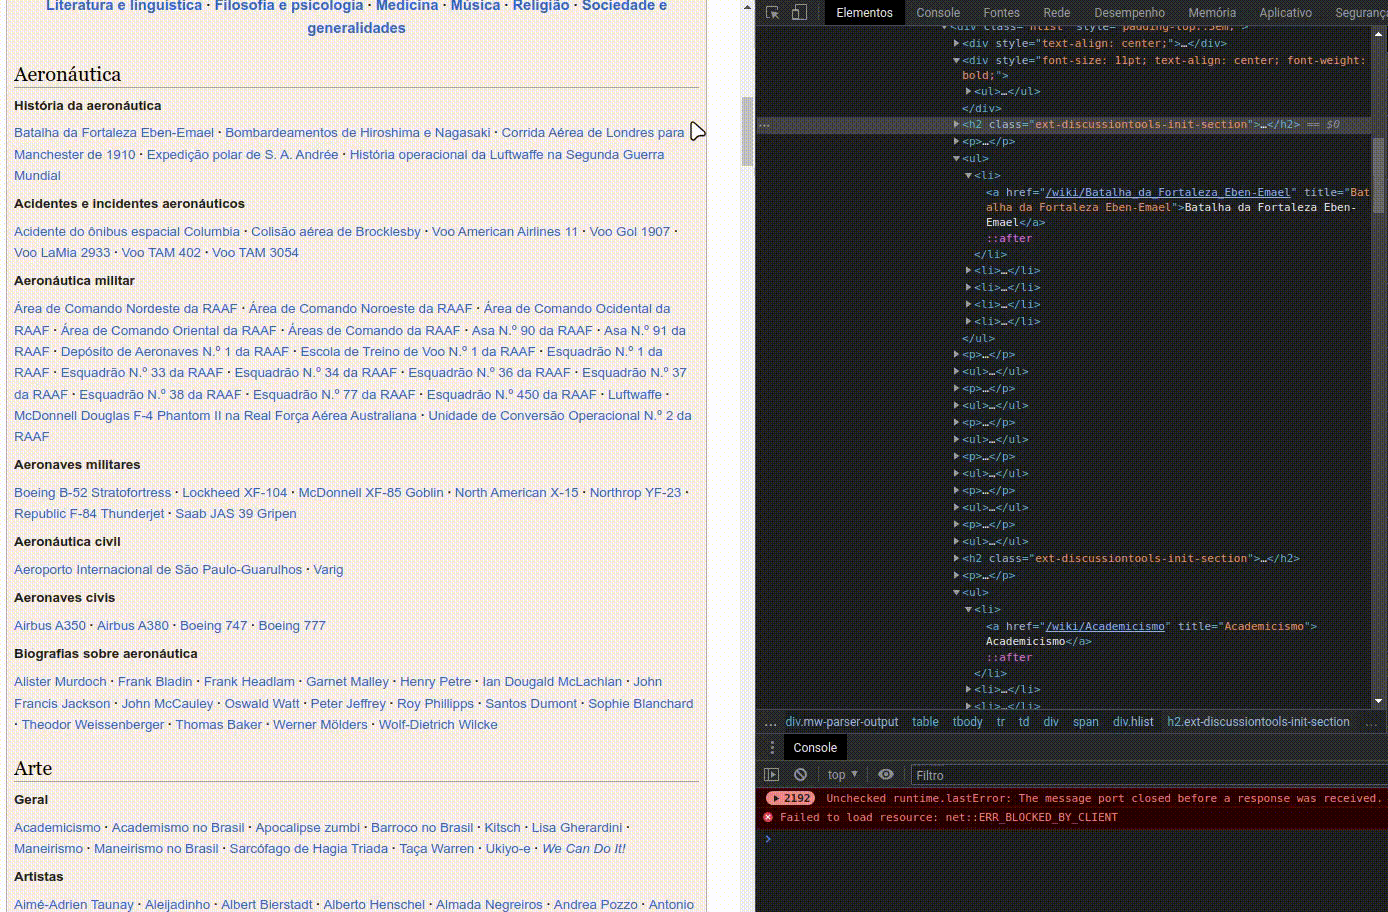

Agora já temos informações suficientes para começar nossa raspagem!

## Acessando a página

Precisaremos criar uma sessão (como se fosse uma sessão de navegação mesmo) para então requisitar a página dos artigos destacados.

Primeiro, vamos guardar a nossa URL da página em uma variável:

In [ ]:
url_artigos_destacados = "https://pt.wikipedia.org/wiki/Wikip%C3%A9dia:Artigos_destacados"

E então, podemos criar uma sessão e fazer a requisição:

In [ ]:
from requests_html import HTMLSession

In [ ]:
sessao = HTMLSession()
pagina_artigos_destacados = sessao.get(url_artigos_destacados)
type(pagina_artigos_destacados)

requests_html.HTMLResponse

O tipo da resposta que obtemos é um `requests_html.HTMLResponse`, e esse objeto nos oferece alguns métodos e atributos. Se quisermos ler o HTML dessa resposta, por exemplo, o acessamos através do `.text`:

In [ ]:
type(pagina_artigos_destacados.text)

str

In [ ]:
pagina_artigos_destacados.text

'<!DOCTYPE html>\n<html class="client-nojs" lang="pt" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Wikipédia:Artigos destacados – Wikipédia, a enciclopédia livre</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\\t.","\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"2d8d722b-ffb8-407e-a4ef-2405cface7e5","wgCSPNonce":false,"wgCanonicalNamespace":"Project","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":4,"wgPageName":"Wikipédia:Artigos_destacados","wgTitle":"Artigos destacados","wgCurRevisionId":36596515,"wgRevisionId":36596515,"wgArticleId":553280,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Conteúdo destacado"],"wgPageContentLanguage":"pt","wgPageContentModel":

Assim podemos validar se nossa requisição traz a resposta que esperamos, comparando os elementos do HTML recebido com o HTML original que observamos no navegador.

*Dica: aqui, usar a função `print()` imprime o html de forma um pouco mais legível*

In [ ]:
print(pagina_artigos_destacados.text)

<!DOCTYPE html>
<html class="client-nojs" lang="pt" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Wikipédia:Artigos destacados – Wikipédia, a enciclopédia livre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janeiro","fevereiro","março","abril","maio","junho","julho","agosto","setembro","outubro","novembro","dezembro"],"wgRequestId":"2d8d722b-ffb8-407e-a4ef-2405cface7e5","wgCSPNonce":false,"wgCanonicalNamespace":"Project","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":4,"wgPageName":"Wikipédia:Artigos_destacados","wgTitle":"Artigos destacados","wgCurRevisionId":36596515,"wgRevisionId":36596515,"wgArticleId":553280,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["!Conteúdo destacado"],"wgPageContentLanguage":"pt","wgPageContentModel":"wikitext",

## Coletando conteúdo da página

Primeiro, analisando novamente os elementos da página, podemos observar que o conteúdo dos artigos fica dentro de um elemento `table`. Vamos dar uma olhada nas tabelas que temos nessa página?

**Qual o XPath que deveríamos utilizar para encontrar todos os elementos `table` na página?**

Resposta: `//table`

In [ ]:
xpath_tabelas = "//table"

Com o método `.html.xpath()` podemos passar um xpath como argumento e teremos como retorno os elementos correspondentes àquela seleção:

In [ ]:
tabelas_na_pagina = pagina_artigos_destacados.html.xpath(xpath_tabelas)
type(tabelas_na_pagina)

list

Como sempre pode haver mais de um elemento na página (no caso, tabelas), o retorno é uma lista. Quantas elementos de tabela temos na página?

In [ ]:
len(tabelas_na_pagina)

4

Temos 4 tabelas, uma delas é a que contém os artigos destacados. Podemos ir vendo de uma a uma qual tem o conteúdo que queremos.

**Qual o índice da tabela que contém os artigos destacados?**

Resposta: 3

In [ ]:
indice_tabela = 3

In [ ]:
tabela_artigos_destacados = tabelas_na_pagina[indice_tabela]
type(tabela_artigos_destacados)

requests_html.Element

Agora vamos observar que o tipo do elemento não é mais `requests_html.HTMLResponse` e sim `requests_html.Element`. Ou seja, talvez os atributos e métodos disponíveis sejam diferentes.

Nesse caso, são diferentes sim. Por exemplo, para ver o conteúdo HTML do elemento agora utilizamos o atributo `.html`:

In [ ]:
tabela_artigos_destacados.html

'<table style="border-spacing: 8px; margin: -8px -8px -2px; width: 101%; background-color: transparent;">\n<tbody><tr>\n<td colspan="2" style="border: 1px solid #bfb1a3; background: #FAF0E6; padding: .5em;"><div style="font-size: 10pt;">\n<div class="plainlinks" style="float: right; margin-left: 1em; font-size: 75%;"><a class="external text" href="https://pt.wikipedia.org/w/index.php?title=Wikip%C3%A9dia:Artigos_destacados/Conte%C3%BAdo&amp;action=edit">editar</a></div>\n<p><span style="font-size: 150%;">Conteúdo</span>\n</p>\n<hr/>\n<span style="font-size: 100%;"><div class="hlist" style="padding-top:.5em;">\n<div style="text-align: center;">Aqui está o sumário temático de artigos destacados por <a href="/wiki/Wikip%C3%A9dia:Escolha_do_artigo_em_destaque" title="Wikip&#xE9;dia:Escolha do artigo em destaque">escolha</a> dos editores</div>\n<div style="font-size: 11pt; text-align: center; font-weight: bold;">\n<ul><li><a href="#Aeron&#xE1;utica">Aeronáutica</a></li>\n<li><a href="#Arte"

E para selecionar elementos internos com XPath, utlizamos o método `.xpath()` diretamente:

In [ ]:
tabela_artigos_destacados.xpath("//div")

[<Element 'div' style='font-size: 10pt;'>,
 <Element 'div' class=('plainlinks',) style='float: right; margin-left: 1em; font-size: 75%;'>,
 <Element 'div' class=('hlist',) style='padding-top:.5em;'>,
 <Element 'div' style='text-align: center;'>,
 <Element 'div' style='font-size: 11pt; text-align: center; font-weight: bold;'>]

Da nossa investigação inicial, sabemos qual o XPath que seleciona o elemento que contém toda a lista de artigos destacados. Vamos armazená-lo em uma varíavel:

In [ ]:
xpath_elemento_contem_artigos = "//span/div[@class='hlist']"

Podemos observar que todos os outros elementos são descendentes imediatos deste que estamos selecionando. Vamos então selecionar todos eles de uma vez, obtendo uma lista. Assim poderemos olhar um por um e distinguir se são seções, subseções ou artigos.

Para isso, vamos acrescentar `/*` ao nosso XPath, para selecionar todos os elementos descendentes imediatos:

In [ ]:
lista_artigos_destacados = tabela_artigos_destacados.xpath(f"{xpath_elemento_contem_artigos}/*")
lista_artigos_destacados

[<Element 'div' style='text-align: center;'>,
 <Element 'div' style='font-size: 11pt; text-align: center; font-weight: bold;'>,
 <Element 'h2' class=('ext-discussiontools-init-section',)>,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'h2' class=('ext-discussiontools-init-section',)>,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'h2' class=('ext-discussiontools-init-section',)>,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Element 'ul' >,
 <Element 'p' >,
 <Eleme

Podemos ver que os elementos correspondem ao que observamos na investigação inicial. Nos resta agora criar o nosso conjunto de dados.

Primeiro, vamos criar uma lista com todas as seções. Vamos armazenar em uma varíavel o tipo do elemento (exemplo: `div`, `p`, etc.) que anotamos na nossa investigação:

In [ ]:
tipo_secoes = 'h2'

Caso o elemento seja do tipo que corresponde a uma seção, vamos armazenar seu texto:

In [ ]:
secoes = []
for elemento in lista_artigos_destacados:
  if elemento.tag == tipo_secoes:
    secao = {"seção": elemento.text}
    secoes.append(secao)

secoes

[{'seção': 'Aeronáutica'},
 {'seção': 'Arte'},
 {'seção': 'Ciência'},
 {'seção': 'Ciências sociais'},
 {'seção': 'Desporto'},
 {'seção': 'Entretenimento'},
 {'seção': 'Geografia'},
 {'seção': 'História'},
 {'seção': 'Literatura e linguística'},
 {'seção': 'Filosofia e psicologia'},
 {'seção': 'Medicina'},
 {'seção': 'Música'},
 {'seção': 'Religião'},
 {'seção': 'Sociedade e generalidades'}]

Vamos descer mais um nível agora e armazenar as subseções também. Primeiro vamos armazenar o tipo do elemento:

In [ ]:
tipo_subsecoes = 'p'

In [ ]:
subsecoes = []
ultima_secao = ''

for elemento in lista_artigos_destacados:
  if elemento.tag == tipo_secoes:
    ultima_secao = elemento.text
  elif elemento.tag == tipo_subsecoes:
    subsecao = {"seção": ultima_secao, "subseção": elemento.text}
    subsecoes.append(subsecao)

subsecoes

[{'seção': 'Aeronáutica', 'subseção': 'História da aeronáutica'},
 {'seção': 'Aeronáutica', 'subseção': 'Acidentes e incidentes aeronáuticos'},
 {'seção': 'Aeronáutica', 'subseção': 'Aeronáutica militar'},
 {'seção': 'Aeronáutica', 'subseção': 'Aeronaves militares'},
 {'seção': 'Aeronáutica', 'subseção': 'Aeronáutica civil'},
 {'seção': 'Aeronáutica', 'subseção': 'Aeronaves civis'},
 {'seção': 'Aeronáutica', 'subseção': 'Biografias sobre aeronáutica'},
 {'seção': 'Arte', 'subseção': 'Geral'},
 {'seção': 'Arte', 'subseção': 'Artistas'},
 {'seção': 'Arte', 'subseção': 'Arquitetura'},
 {'seção': 'Arte', 'subseção': 'Escultura'},
 {'seção': 'Arte', 'subseção': 'Pintura'},
 {'seção': 'Ciência', 'subseção': 'Cientistas'},
 {'seção': 'Ciência', 'subseção': 'Astronomia e astronáutica'},
 {'seção': 'Ciência', 'subseção': 'Biologia'},
 {'seção': 'Ciência', 'subseção': 'Botânica'},
 {'seção': 'Ciência', 'subseção': 'Energia'},
 {'seção': 'Ciência', 'subseção': 'Micologia'},
 {'seção': 'Ciência', 

Vamos descer maaais ainda e armazenar os artigos agora. Primeiro vamos armazenar os tipos dos elementos:

In [ ]:
tipo_lista_artigos = 'ul'
tipo_elemento_artigo = 'li'

In [ ]:
artigos = []
ultima_secao = ''
ultima_subsecao = ''

for elemento in lista_artigos_destacados:
  if elemento.tag == tipo_secoes:
    ultima_secao = elemento.text
  elif elemento.tag == tipo_subsecoes:
    ultima_subsecao = elemento.text
  elif elemento.tag == tipo_lista_artigos:
    lista_elementos = elemento.xpath(f"//{tipo_elemento_artigo}")
    for elemento_artigo in lista_elementos:
      artigo = {"seção": ultima_secao, "subseção": ultima_subsecao, "artigo": elemento_artigo.text}
      artigos.append(artigo)

artigos

[{'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'Batalha da Fortaleza Eben-Emael'},
 {'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'Bombardeamentos de Hiroshima e Nagasaki'},
 {'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'Corrida Aérea de Londres para Manchester de 1910'},
 {'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'Expedição polar de S. A. Andrée'},
 {'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'História operacional da Luftwaffe na Segunda Guerra Mundial'},
 {'seção': 'Aeronáutica',
  'subseção': 'Acidentes e incidentes aeronáuticos',
  'artigo': 'Acidente do ônibus espacial Columbia'},
 {'seção': 'Aeronáutica',
  'subseção': 'Acidentes e incidentes aeronáuticos',
  'artigo': 'Colisão aérea de Brocklesby'},
 {'seção': 'Aeronáutica',
  'subseção': 'Acidentes e incidentes aeronáuticos',
  'artigo': 'Voo American Airlines 11'

Note que precisamos realizar um `for` dentro de outro `for` nesse caso. Quando estamos iterando sobre os elementos no mesmo nível das seções e subseções nós encontramos elementos que são listas de artigos de determinada subseção. Então, para coletar cada artigo individualmente, temos que iterar por todos os elementos que compõem aquela lista.

Agora, se quisermos coletar as URLs, poderíamos buscar o atributo através de XPath.



**Com qual XPath poderíamos buscar a URL de um artigo?**

Resposta: `//a/@href`

In [ ]:
xpath_link = "//a/@href"

In [ ]:
artigos = []
ultima_secao = ''
ultima_subsecao = ''

for elemento in lista_artigos_destacados:
  if elemento.tag == tipo_secoes:
    ultima_secao = elemento.text
  elif elemento.tag == tipo_subsecoes:
    ultima_subsecao = elemento.text
  elif elemento.tag == tipo_lista_artigos:
    for elemento_artigo in elemento.xpath(f"//{tipo_elemento_artigo}"):
      url = elemento_artigo.xpath(xpath_link)
      artigo = {"seção": ultima_secao, "subseção": ultima_subsecao, "artigo": elemento_artigo.text, "artigo_url": url}
      artigos.append(artigo)

artigos

[{'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'Batalha da Fortaleza Eben-Emael',
  'artigo_url': ['/wiki/Batalha_da_Fortaleza_Eben-Emael']},
 {'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'Bombardeamentos de Hiroshima e Nagasaki',
  'artigo_url': ['/wiki/Bombardeamentos_de_Hiroshima_e_Nagasaki']},
 {'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'Corrida Aérea de Londres para Manchester de 1910',
  'artigo_url': ['/wiki/Corrida_A%C3%A9rea_de_Londres_para_Manchester_de_1910']},
 {'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'Expedição polar de S. A. Andrée',
  'artigo_url': ['/wiki/Expedi%C3%A7%C3%A3o_polar_de_S._A._Andr%C3%A9e']},
 {'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'História operacional da Luftwaffe na Segunda Guerra Mundial',
  'artigo_url': ['/wiki/Hist%C3%B3ria_operacional_da_Luftwaffe_na_Segunda_Guerra_Mundial']},

Podemos ver que ainda precisa de ajustes. Por exemplo, como o retorno do método `.xpath()` é uma lista, precisamos obter apenas o primeiro elemento. Além disso, o link é relativo, ou seja, ainda precisaria ser concatenado com `https://pt.wikipedia.org`.

In [ ]:
artigos = []
ultima_secao = ''
ultima_subsecao = ''

for elemento in lista_artigos_destacados:
  if elemento.tag == tipo_secoes:
    ultima_secao = elemento.text
  elif elemento.tag == tipo_subsecoes:
    ultima_subsecao = elemento.text
  elif elemento.tag == tipo_lista_artigos:
    for elemento_artigo in elemento.xpath(f"//{tipo_elemento_artigo}"):
      url = elemento_artigo.xpath(xpath_link)[0]
      artigo = {"seção": ultima_secao, "subseção": ultima_subsecao, "artigo": elemento_artigo.text, "artigo_url": f"https://pt.wikipedia.org{url}"}
      artigos.append(artigo)

artigos

[{'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'Batalha da Fortaleza Eben-Emael',
  'artigo_url': 'https://pt.wikipedia.org/wiki/Batalha_da_Fortaleza_Eben-Emael'},
 {'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'Bombardeamentos de Hiroshima e Nagasaki',
  'artigo_url': 'https://pt.wikipedia.org/wiki/Bombardeamentos_de_Hiroshima_e_Nagasaki'},
 {'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'Corrida Aérea de Londres para Manchester de 1910',
  'artigo_url': 'https://pt.wikipedia.org/wiki/Corrida_A%C3%A9rea_de_Londres_para_Manchester_de_1910'},
 {'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'Expedição polar de S. A. Andrée',
  'artigo_url': 'https://pt.wikipedia.org/wiki/Expedi%C3%A7%C3%A3o_polar_de_S._A._Andr%C3%A9e'},
 {'seção': 'Aeronáutica',
  'subseção': 'História da aeronáutica',
  'artigo': 'História operacional da Luftwaffe na Segunda Guerra Mundial',
  'a

## Salvando os itens

Com a nossa base de dados preenchida, podemos salvá-la! Primeiro, uma maneira de salvar itens em CSV utilizando a biblioteca `csv` que já vem com o Python:

In [ ]:
import csv

In [ ]:
with open('artigos_destacados.csv', 'w') as arquivo_csv:  # Abrindo um arquivo em modo de escrita
  colunas = artigos[0].keys()  # Indicando o nome das colunas a partir do primeiro item da nossa lista
  escritor_csv = csv.DictWriter(arquivo_csv, fieldnames=colunas)  # Declarando um objeto que escreve CSV no arquivo determinado e com as colunas indicadas
  escritor_csv.writeheader()  # Escrevendo o cabeçalho no CSV
  for linha in artigos:
    escritor_csv.writerow(linha)  # Para cada item da lista, escrever uma linha no CSV

Veja o arquivo `artigos_destacados.csv` que foi criado. Temos nossa primeira base de dados criada!

**Dica**: também podemos escrever o CSV sem usar um `for`, com o método `.writerows()`

In [ ]:
with open('artigos_destacados.csv', 'w') as arquivo_csv:
  colunas = artigos[0].keys()
  escritor_csv = csv.DictWriter(arquivo_csv, fieldnames=colunas)
  escritor_csv.writeheader()
  escritor_csv.writerows(artigos)  # Realiza a mesma tarefa que fazíamos antes, mas nesse método podemos passar a lista completa como argumento

Com isso já temos mais confiança que conseguimos coletar dados e armazená-los. Isso já nos abre um mundo de possibilidades!

## Utilizando Pandas

Como já vimos nos módulos anteriores, a biblioteca `pandas` é muito útil para manipular dados. Aqui, também podemos utilizá-la caso nossa base de dados precise de alguma manipulação antes de a salvarmos.

In [ ]:
import pandas as pd

Converter nossa lista de artigos em um `DataFrame` é muito simples, já que é uma lista de dicionários:

In [ ]:
artigos_df = pd.DataFrame(artigos)
artigos_df

seção                 subseção  \
0                   Aeronáutica  História da aeronáutica   
1                   Aeronáutica  História da aeronáutica   
2                   Aeronáutica  História da aeronáutica   
3                   Aeronáutica  História da aeronáutica   
4                   Aeronáutica  História da aeronáutica   
...                         ...                      ...   
1333  Sociedade e generalidades                  Nobreza   
1334  Sociedade e generalidades                  Nobreza   
1335  Sociedade e generalidades                  Nobreza   
1336  Sociedade e generalidades                  Nobreza   
1337  Sociedade e generalidades                  Nobreza   

                                                 artigo  \
0                       Batalha da Fortaleza Eben-Emael   
1               Bombardeamentos de Hiroshima e Nagasaki   
2      Corrida Aérea de Londres para Manchester de 1910   
3                       Expedição polar de S. A. Andrée   
4     História operacional da Luftwaffe na Segunda G...   
...                                                 ...   
1333                               Simeão I da Bulgária   
1334           Teresa Cristina de Bourbon-Duas Sicílias   
1335                             Vitória do Reino Unido   
1336                Vitória Melita de Saxe-Coburgo-Gota   
1337              Vitória, Princesa Real do Reino Unido   

                                             artigo_url  
0     https://pt.wikipedia.org/wiki/Batalha_da_Forta...  
1     https://pt.wikipedia.org/wiki/Bombardeamentos_...  
2     https://pt.wikipedia.org/wiki/Corrida_A%C3%A9r...  
3     https://pt.wikipedia.org/wiki/Expedi%C3%A7%C3%...  
4     https://pt.wikipedia.org/wiki/Hist%C3%B3ria_op...  
...                                                 ...  
1333  https://pt.wikipedia.org/wiki/Sime%C3%A3o_I_da...  
1334  https://pt.wikipedia.org/wiki/Teresa_Cristina_...  
1335  https://pt.wikipedia.org/wiki/Vit%C3%B3ria_do_...  
1336  https://pt.wikipedia.org/wiki/Vit%C3%B3ria_Mel...  
1337  https://pt.wikipedia.org/wiki/Vit%C3%B3ria,_Pr...  

[1338 rows x 4 columns]

Aqui já temos um `DataFrame` e poderíamos aplicar os conhecimentos que aprendemos anteriormente!

E, após fazer quaisquer manipulações desejadas, salvar em CSV é muito simples com o método `.to_csv()`:

In [ ]:
artigos_df.to_csv('artigos_destacados_pandas.csv')

Observem o arquivo gerado, a única diferença é que a coluna do índice está presente. Podemos fazer com que ela não seja escrita, se for o caso:

In [ ]:
artigos_df.to_csv('artigos_destacados_pandas.csv', index=False)

Com isso, podemos ver que os arquivos gerados com a biblioteca `csv` e `pandas` são idênticos!

Agora, já que estamos usando `pandas` também poderíamos tentar usar o `.read_html()` que aprendemos. Será que funciona?

In [ ]:
tabelas_artigos_destacados = pd.read_html(url_artigos_destacados)
tabelas_artigos_destacados

[                                                   0  \
 0  Artigos destacados na Wikipédia Esta página co...   
 
                                                    1  
 0  .mw-parser-output .module-shortcutboxplain{flo...  ,
                                                    0  \
 0  editar Arquivo cronológico 2004 2005 2006 2007...   
 
                                                    1  
 0  editar Arquivo cronológico 2004 2005 2006 2007...  ,
                                                    0  \
 0  editar Artigo destacado aleatório O Pensamento...   
 
                                                    1  
 0  editar Artigo destacado aleatório O Pensamento...  ,
                                                    0  \
 0  editar Conteúdo Aqui está o sumário temático d...   
 
                                                    1  
 0  editar Conteúdo Aqui está o sumário temático d...  ]

Podemos ver que algumas tabelas foram encontradas na página. A que desejamos é a de índice número 3:

In [ ]:
tabelas_artigos_destacados[3]

0  \
0  editar Conteúdo Aqui está o sumário temático d...   

                                                   1  
0  editar Conteúdo Aqui está o sumário temático d...

O `DataFrame` tem duas colunas e uma linha, e não nos diz muita coisa. Vamos observar a primeira linha um pouco mais de perto:

In [ ]:
tabelas_artigos_destacados[3].iloc[0]

0    editar Conteúdo Aqui está o sumário temático d...
1    editar Conteúdo Aqui está o sumário temático d...
Name: 0, dtype: object

Ainda não ajuda. Vamos selecionar a coluna 0 dessa linha e ver seu conteúdo:

In [ ]:
tabelas_artigos_destacados[3].iloc[0][0]

'editar Conteúdo Aqui está o sumário temático de artigos destacados por escolha dos editores Aeronáutica Arte Ciência Ciências sociais Desporto Entretenimento Geografia História Literatura e linguística Filosofia e psicologia Medicina Música Religião Sociedade e generalidades Aeronáutica História da aeronáutica Batalha da Fortaleza Eben-Emael Bombardeamentos de Hiroshima e Nagasaki Corrida Aérea de Londres para Manchester de 1910 Expedição polar de S. A. Andrée História operacional da Luftwaffe na Segunda Guerra Mundial Acidentes e incidentes aeronáuticos Acidente do ônibus espacial Columbia Colisão aérea de Brocklesby Voo American Airlines 11 Voo Gol 1907 Voo LaMia 2933 Voo TAM 402 Voo TAM 3054 Aeronáutica militar Área de Comando Nordeste da RAAF Área de Comando Noroeste da RAAF Área de Comando Ocidental da RAAF Área de Comando Oriental da RAAF Áreas de Comando da RAAF Asa N.º 90 da RAAF Asa N.º 91 da RAAF Depósito de Aeronaves N.º 1 da RAAF Escola de Treino de Voo N.º 1 da RAAF Esqua

Podemos ver que o conteúdo textual está aqui, mas sem nenhuma hierarquia ou algo do tipo. Será que a coluna 1 ajuda?

In [ ]:
tabelas_artigos_destacados[3].iloc[0][1]

'editar Conteúdo Aqui está o sumário temático de artigos destacados por escolha dos editores Aeronáutica Arte Ciência Ciências sociais Desporto Entretenimento Geografia História Literatura e linguística Filosofia e psicologia Medicina Música Religião Sociedade e generalidades Aeronáutica História da aeronáutica Batalha da Fortaleza Eben-Emael Bombardeamentos de Hiroshima e Nagasaki Corrida Aérea de Londres para Manchester de 1910 Expedição polar de S. A. Andrée História operacional da Luftwaffe na Segunda Guerra Mundial Acidentes e incidentes aeronáuticos Acidente do ônibus espacial Columbia Colisão aérea de Brocklesby Voo American Airlines 11 Voo Gol 1907 Voo LaMia 2933 Voo TAM 402 Voo TAM 3054 Aeronáutica militar Área de Comando Nordeste da RAAF Área de Comando Noroeste da RAAF Área de Comando Ocidental da RAAF Área de Comando Oriental da RAAF Áreas de Comando da RAAF Asa N.º 90 da RAAF Asa N.º 91 da RAAF Depósito de Aeronaves N.º 1 da RAAF Escola de Treino de Voo N.º 1 da RAAF Esqua

A mesma coisa...

Por fim notamos que algumas abordagens podem não funcionar sempre. Nesse caso, o `.read_html()` funciona quando a `table` em HTML é bem formatada, ou seja, possui elementos como `tbody`, `thead`, `tr` e `td`. Não é o nosso caso, então a coleta dos dados não funciona.

Em práticas futuras, testar com o `.read_html()` é sempre uma ótima opção inicial, pois é a abordagem mais fácil e simples. Caso não funcione, vamos para abordagens um pouco mais complexas e específicas como a de escrever um algoritmo de raspagem com `requests_html`.

Algumas vezes precisaremos de mais eficiência, então utilizaremos Scrapy. Ou então precisaremos de um simulador de navegador como Selenium. Mas pra grande maioria dos casos, o que aprendemos até agora já é suficiente!

## Finalizando o desafio!

Se tiver curiosidade e quiser tentar fazer a coleta dos textos introdutórios de cada artigo, seria uma ÓTIMA prática. Raspagem de dados vai ficando muito mais fácil com mais experiências e mais práticas.

Boa jornada!